In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
## Construct folder & file names as lists of strings for every seed used.
nruns = 10
runnums = np.arange(1,nruns+1)
seeds = runnums*101
sruns = ['test_oscomp_rs'+seed.astype(str)+'_s_1' for seed in seeds]
oruns = ['test_oscomp_rs'+seed.astype(str)+'_o_1' for seed in seeds]
slogs = ['logz_rs'+seed.astype(str)+'_s' for seed in seeds]
serrs = ['logzerr_rs'+seed.astype(str)+'_s' for seed in seeds]
ologs = ['logz_rs'+seed.astype(str)+'_o' for seed in seeds]
oerrs = ['logzerr_rs'+seed.astype(str)+'_o' for seed in seeds]

In [3]:
## Pull final logz, logzerr from all orbiting runs.
ologz = np.zeros(len(seeds))
ologzerr = np.zeros(len(seeds))
i = 0
for rr,ll,ee in zip(oruns,ologs,oerrs):
    ologz[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ll+'.txt')[-1]
    ologzerr[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ee+'.txt')[-1]
    #ologz[i] = np.loadtxt('./blip/'+rr+'/'+ll+'.txt')[-1]
    #ologzerr[i] = np.loadtxt('./blip/'+rr+'/'+ee+'.txt')[-1]
    i = i+1
print(ologz)
print(ologzerr)

[4453194.61392826 4453194.57705095 4453194.34378804 4453194.24258826
 4453194.11191647 4453194.29987059 4453193.77873298 4453194.07876862
 4453194.38148343 4453194.66670181]
[0.19175766 0.18839893 0.19504311 0.19353421 0.19812191 0.19740099
 0.19943404 0.1947169  0.1946496  0.19534935]


In [4]:
## Do the same for all stationary runs. 
slogz = np.zeros(len(seeds))
slogzerr = np.zeros(len(seeds))
i = 0
for rr,ll,ee in zip(sruns,slogs,serrs):
    slogz[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ll+'.txt')[-1]
    slogzerr[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ee+'.txt')[-1]
#     slogz[i] = np.loadtxt('./blip/'+rr+'/'+ll+'.txt')[-1]
#     slogzerr[i] = np.loadtxt('./blip/'+rr+'/'+ee+'.txt')[-1]
    i = i+1
print(slogz)
print(slogzerr)

[4453189.5099686  4453189.32323333 4453189.35246425 4453189.12940734
 4453189.21268088 4453189.33121176 4453189.29047323 4453188.91690117
 4453189.75180012 4453189.6490796 ]
[0.19089529 0.19183095 0.19182181 0.1961292  0.19544028 0.19247514
 0.19859451 0.1955434  0.19188941 0.19501008]


In [5]:
## Calculate Bayes' Factor  of orbiting v. stationary case. K=Z_o/Z_s=exp(logZ_o - logZ_s)
K = np.exp(ologz - slogz)
print(ologz - slogz)
print(K)

[5.10395966 5.25381762 4.99132379 5.11318092 4.89923559 4.96865883
 4.48825974 5.16186745 4.62968331 5.01762222]
[164.67266568 191.2951681  147.13106466 166.19817767 134.18716638
 143.83385164  88.96648653 174.49000371 102.4816038  151.0517082 ]


In [6]:
## Calculate error in Bayes' Factor

sigos = np.sqrt(ologzerr**2+slogzerr**2)
print(sigos)
sigK = K*sigos
print(sigK)

[0.27057718 0.26887408 0.27356429 0.27553975 0.27829695 0.27570606
 0.28144931 0.27595632 0.27333133 0.2760259 ]
[44.5566655  51.43431159 40.24980569 45.79420429 37.34387925 39.65586436
 25.03955668 48.15161942 28.01143264 41.69418434]


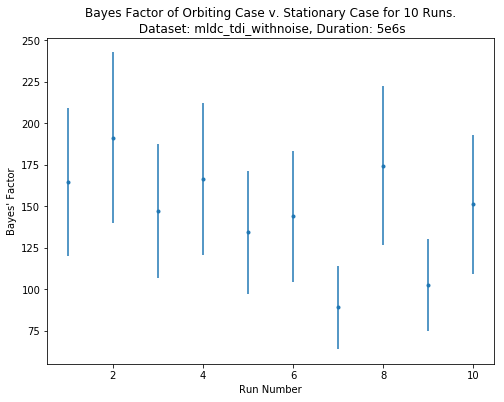

In [7]:
plt.figure(figsize=(8,6))#,dpi=200)
#plt.plot(runnums,K)
plt.errorbar(runnums,K,xerr=None,yerr=sigK,ls='none',marker='.')
plt.title('Bayes Factor of Orbiting Case v. Stationary Case for %i Runs.\n Dataset: mldc_tdi_withnoise, Duration: 5e6s' % len(runnums))
plt.xlabel('Run Number')
plt.ylabel("Bayes' Factor")
plt.show()

In [8]:
## Second data run using 2mo (5e6s) data from SGWB_withnoise_full.txt
## Construct folder & file names as lists of strings for every seed used.
nruns2 = 10
runnums2 = np.arange(1,nruns2+1)
seeds2 = runnums2*42
sruns2 = ['test_oscomp_rs'+seed.astype(str)+'_s_2' for seed in seeds2]
oruns2 = ['test_oscomp_rs'+seed.astype(str)+'_o_2' for seed in seeds2]
slogs2 = ['logz_rs'+seed.astype(str)+'_s' for seed in seeds2]
serrs2 = ['logzerr_rs'+seed.astype(str)+'_s' for seed in seeds2]
ologs2 = ['logz_rs'+seed.astype(str)+'_o' for seed in seeds2]
oerrs2 = ['logzerr_rs'+seed.astype(str)+'_o' for seed in seeds2]

In [9]:
## Pull final logz, logzerr from all orbiting runs.
ologz2 = np.zeros(len(seeds2))
ologzerr2 = np.zeros(len(seeds2))
i = 0
for rr,ll,ee in zip(oruns2,ologs2,oerrs2):
    ologz2[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ll+'.txt')[-1]
    ologzerr2[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ee+'.txt')[-1]
    #ologz[i] = np.loadtxt('./blip/'+rr+'/'+ll+'.txt')[-1]
    #ologzerr[i] = np.loadtxt('./blip/'+rr+'/'+ee+'.txt')[-1]
    i = i+1
print(ologz2)
print(ologzerr2)

[4453193.96903413 4453194.17284896 4453194.34413174 4453194.32880209
 4453194.56595846 4453194.28794108 4453194.31157048 4453194.60503371
 4453194.44733402 4453194.27140039]
[0.19701083 0.1934385  0.19322098 0.19286555 0.19472299 0.19137616
 0.19925114 0.19825491 0.18903123 0.19257262]


In [10]:
## Do the same for all stationary runs. 
slogz2 = np.zeros(len(seeds2))
slogzerr2 = np.zeros(len(seeds2))
i = 0
for rr,ll,ee in zip(sruns2,slogs2,serrs2):
    slogz2[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ll+'.txt')[-1]
    slogzerr2[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ee+'.txt')[-1]
#     slogz[i] = np.loadtxt('./blip/'+rr+'/'+ll+'.txt')[-1]
#     slogzerr[i] = np.loadtxt('./blip/'+rr+'/'+ee+'.txt')[-1]
    i = i+1
print(slogz2)
print(slogzerr2)

[4453189.31507716 4453189.33274509 4453189.21727726 4453189.61421831
 4453189.45063582 4453189.53056832 4453189.62932423 4453189.62406539
 4453189.13772112 4453189.61806927]
[0.1979432  0.19617612 0.20056844 0.19605    0.19207037 0.19374248
 0.19544941 0.1908011  0.19737824 0.18995346]


In [11]:
## Calculate Bayes' Factor  of orbiting v. stationary case. K=Z_o/Z_s=exp(logZ_o - logZ_s)
K2 = np.exp(ologz2 - slogz2)
print(ologz2 - slogz2)
print(K2)

[4.65395697 4.84010387 5.12685448 4.71458378 5.11532265 4.75737276
 4.68224625 4.98096832 5.30961289 4.65333112]
[104.99964491 126.48248823 168.48630695 111.56236719 166.55451073
 116.43960881 108.0124236  145.61531587 202.27191265 104.93395206]


In [12]:
## Calculate error in Bayes' Factor

sigos2 = np.sqrt(ologzerr2**2+slogzerr2**2)
print(sigos2)
sigK2 = K2*sigos2
print(sigK2)

[0.27927545 0.27550593 0.27849963 0.27501404 0.27351064 0.27232514
 0.27910838 0.27515463 0.2732965  0.27049313]
[29.32382326 34.84667611 46.92337494 30.6812169  45.55443042 31.70943333
 30.14717237 40.06672822 55.2802053  28.3839128 ]


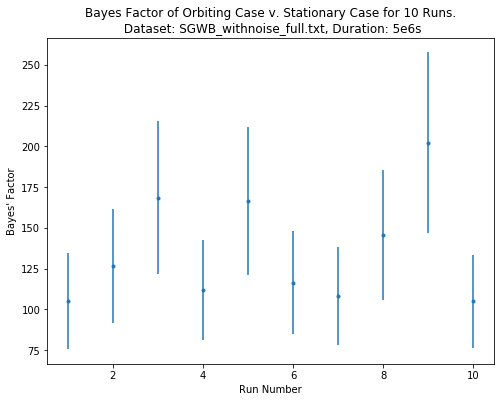

In [13]:
plt.figure(figsize=(8,6))#,dpi=200)
#plt.plot(runnums2,K2)
plt.errorbar(runnums2,K2,xerr=None,yerr=sigK2,ls='none',marker='.')
plt.title('Bayes Factor of Orbiting Case v. Stationary Case for %i Runs.\n Dataset: SGWB_withnoise_full.txt, Duration: 5e6s' % len(runnums2))
plt.xlabel('Run Number')
plt.ylabel("Bayes' Factor")
plt.show()

In [14]:
## Third data run using 2mo (5e6s) data from noiseless_mldc.txt
## Construct folder & file names as lists of strings for every seed used.
nruns3 = 4
runnums3 = np.arange(1,nruns3+1)
seeds3 = runnums3*10
sruns3 = ['test_oscomp_rs'+seed.astype(str)+'_s_3' for seed in seeds3]
oruns3 = ['test_oscomp_rs'+seed.astype(str)+'_o_3' for seed in seeds3]
slogs3 = ['logz_rs'+seed.astype(str)+'_s' for seed in seeds3]
serrs3 = ['logzerr_rs'+seed.astype(str)+'_s' for seed in seeds3]
ologs3 = ['logz_rs'+seed.astype(str)+'_o' for seed in seeds3]
oerrs3 = ['logzerr_rs'+seed.astype(str)+'_o' for seed in seeds3]

In [15]:
## Pull final logz, logzerr from all orbiting runs.
ologz3 = np.zeros(len(seeds3))
ologzerr3 = np.zeros(len(seeds3))
i = 0
for rr,ll,ee in zip(oruns3,ologs3,oerrs3):
    ologz3[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ll+'.txt')[-1]
    ologzerr3[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ee+'.txt')[-1]
    #ologz[i] = np.loadtxt('./blip/'+rr+'/'+ll+'.txt')[-1]
    #ologzerr[i] = np.loadtxt('./blip/'+rr+'/'+ee+'.txt')[-1]
    i = i+1
print(ologz3)
print(ologzerr3)

IOError: ../../blip/storage/shared storage/OScomp all outputs/test_oscomp_rs10_o_3/logz_rs10_o.txt not found.

In [ ]:
## Pull final logz, logzerr from all orbiting runs.
ologz3 = np.zeros(len(seeds3))
ologzerr3 = np.zeros(len(seeds3))
i = 0
for rr,ll,ee in zip(oruns3,ologs3,oerrs3):
    ologz3[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ll+'.txt')[-1]
    ologzerr3[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ee+'.txt')[-1]
    #ologz[i] = np.loadtxt('./blip/'+rr+'/'+ll+'.txt')[-1]
    #ologzerr[i] = np.loadtxt('./blip/'+rr+'/'+ee+'.txt')[-1]
    i = i+1
print(ologz3)
print(ologzerr3)

In [ ]:
## Calculate Bayes' Factor  of orbiting v. stationary case. K=Z_o/Z_s=exp(logZ_o - logZ_s)
K3 = np.exp(ologz3 - slogz3)
print(ologz3 - slogz3)
print(K3)

In [ ]:
## Calculate error in Bayes' Factor

sigos3 = np.sqrt(ologzerr3**2+slogzerr3**2)
print(sigos3)
sigK3 = K3*sigos3
print(sigK3)

In [5]:
plt.figure(figsize=(8,6))#,dpi=200)
#plt.plot(runnums2,K2)
plt.errorbar(runnums3,K3,xerr=None,yerr=sigK3,ls='none',marker='.')
plt.title('Bayes Factor of Orbiting Case v. Stationary Case for %i Runs.\n Dataset: SGWB_withnoise_full.txt, Duration: 5e6s' % len(runnums3))
plt.xlabel('Run Number')
plt.ylabel("Bayes' Factor")
plt.show()

NameError: name 'K3' is not defined

<Figure size 576x432 with 0 Axes>

In [ ]:
## Compare across different cases

In [16]:
## Construct folder & file names as lists of strings for every seed used.
ncases = 12
casenums = np.arange(2,ncases+2)
# casenums[1:] = casenums[1:]+1
seed = '10'
segnums = np.array([1,2,3,4,5,6,7,8,9,10,11])
durs = np.array([1.26e7,2.5e6,2.5e6,5e6,5e6,5e6,5e6,5e6,5e6,5e6,5e6,5e6])
starts = np.array([0,0,5e6,2.5e6,5e6,0,1e6,3e6,7.5e6,5e5,4e6,6.5e6])
cases = ['MLDCsegment'+sn.astype(str) for sn in segnums]
cases.insert(0,'MLDCfull')
sruns = ['test_osmulti_s'+cn.astype(str) for cn in casenums]
oruns = ['test_osmulti_o'+cn.astype(str) for cn in casenums]

slogs = 'logz_rs'+seed+'_s'
serrs = 'logzerr_rs'+seed+'_s'
ologs = 'logz_rs'+seed+'_o'
oerrs = 'logzerr_rs'+seed+'_o'
print(cases)
print(sruns)
print(oruns)
print(durs)
print(starts)

['MLDCfull', 'MLDCsegment1', 'MLDCsegment2', 'MLDCsegment3', 'MLDCsegment4', 'MLDCsegment5', 'MLDCsegment6', 'MLDCsegment7', 'MLDCsegment8', 'MLDCsegment9', 'MLDCsegment10', 'MLDCsegment11']
['test_osmulti_s2', 'test_osmulti_s3', 'test_osmulti_s4', 'test_osmulti_s5', 'test_osmulti_s6', 'test_osmulti_s7', 'test_osmulti_s8', 'test_osmulti_s9', 'test_osmulti_s10', 'test_osmulti_s11', 'test_osmulti_s12', 'test_osmulti_s13']
['test_osmulti_o2', 'test_osmulti_o3', 'test_osmulti_o4', 'test_osmulti_o5', 'test_osmulti_o6', 'test_osmulti_o7', 'test_osmulti_o8', 'test_osmulti_o9', 'test_osmulti_o10', 'test_osmulti_o11', 'test_osmulti_o12', 'test_osmulti_o13']
[12600000.  2500000.  2500000.  5000000.  5000000.  5000000.  5000000.
  5000000.  5000000.  5000000.  5000000.  5000000.]
[      0.       0. 5000000. 2500000. 5000000.       0. 1000000. 3000000.
 7500000.  500000. 4000000. 6500000.]


In [17]:
## Pull final logz, logzerr from all orbiting runs.
ologz = np.zeros(len(casenums))
ologzerr = np.zeros(len(casenums))
i = 0
for rr in oruns:
    ologz[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+ologs+'.txt')[-1]
    ologzerr[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+oerrs+'.txt')[-1]
    i = i+1
print(ologz)
print(ologzerr)

[11290494.17646144  2204193.1574721   2203998.59120746  4453026.42210083
  4453209.83683868  4453194.12851066  4453270.99567796  4453244.58134556
  4453061.1945384   4452978.35999371  4453069.31101188  4453274.83821047]
[0.32323378 0.26881497 0.26687557 0.28033009 0.27288952 0.27736087
 0.27297527 0.27710128 0.27561219 0.27809546 0.28033502 0.27892819]


In [18]:
## Do the same for all stationary runs. 
slogz = np.zeros(len(casenums))
slogzerr = np.zeros(len(casenums))
i = 0
for rr in sruns:
    slogz[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+slogs+'.txt')[-1]
    slogzerr[i] = np.loadtxt("../../blip/storage/shared storage/OScomp all outputs/"+rr+'/'+serrs+'.txt')[-1]
    i = i+1
print(slogz)
print(slogzerr)

[11290466.4696689   2204190.54045863  2203990.10958046  4453010.97208779
  4453199.25985068  4453189.56668086  4453246.80433556  4453231.4488535
  4453040.62896629  4452963.29221501  4453054.01222165  4453261.51367227]
[0.27340945 0.27079732 0.26609972 0.28143097 0.27671917 0.26905366
 0.28811569 0.27657733 0.28146043 0.27936454 0.27535609 0.27896529]


In [19]:
# ologz = np.loadtxt("../../blip/test_osmulti_o2/logz_rs10_o.txt")[-1]
# slogz = np.loadtxt("../../blip/test_osmulti_s2/logz_rs10_s.txt")[-1]
# ologzerr = np.loadtxt("../../blip/test_osmulti_o2/logzerr_rs10_o.txt")[-1]
# slogzerr = np.loadtxt("../../blip/test_osmulti_s2/logzerr_rs10_s.txt")[-1]

# print((ologz,slogz,ologzerr,slogzerr))

In [20]:
## Calculate Bayes' Factor  of orbiting v. stationary case. K=Z_o/Z_s=exp(logZ_o - logZ_s)
K = np.exp(ologz - slogz)
print(ologz - slogz)
print(K)
logK = np.log(K)
print(logK)

[27.70679254  2.61701347  8.481627   15.45001304 10.576988    4.5618298
 24.1913424  13.13249206 20.56557211 15.0677787  15.29879023 13.3245382 ]
[1.07871597e+12 1.36947626e+01 4.82529429e+03 5.12690664e+06
 3.92218001e+04 9.57585388e+01 3.20749889e+10 5.05090077e+05
 8.54111332e+08 3.49826853e+06 4.40737674e+06 6.12030990e+05]
[27.70679254  2.61701347  8.481627   15.45001304 10.576988    4.5618298
 24.1913424  13.13249206 20.56557211 15.0677787  15.29879023 13.3245382 ]


In [21]:
## Calculate error in Bayes' Factor
## Error is 1-sigma & approximate, see dynesty documentation for further details.
sigos = np.sqrt(ologzerr**2+slogzerr**2)
print(sigos)
sigK = K*sigos
print(sigK)

[0.42335896 0.38156608 0.37687084 0.39722582 0.38864147 0.38641807
 0.39689564 0.39151007 0.39393153 0.39418477 0.39294872 0.39449026]
[4.56684071e+11 5.22545695e+00 1.81851272e+03 2.03653968e+06
 1.52432180e+04 3.70028297e+01 1.27304231e+10 1.97747853e+05
 3.36461381e+08 1.37896416e+06 1.73187304e+06 2.41440264e+05]


In [22]:
# #Plot Bayes' Factor
# plt.figure(figsize=(8,6))#,dpi=200)
# #plt.plot(runnums,K)
# plt.errorbar(casenums[1],K[1],xerr=None,yerr=sigK[1],ls='none',marker='.')
# plt.errorbar(casenums[2],K[2],xerr=None,yerr=sigK[2],ls='none',marker='.')
# plt.errorbar(casenums[3],K[3],xerr=None,yerr=sigK[3],ls='none',marker='.')
# plt.errorbar(casenums[4],K[4],xerr=None,yerr=sigK[4],ls='none',marker='.')
# plt.title('Bayes Factor of Orbiting Case v. Stationary Case for %i Different Cases' % len(casenums))
# plt.xlabel('Run Number')
# plt.ylabel("Bayes' Factor")
# plt.legend(cases[1:])
# plt.show()

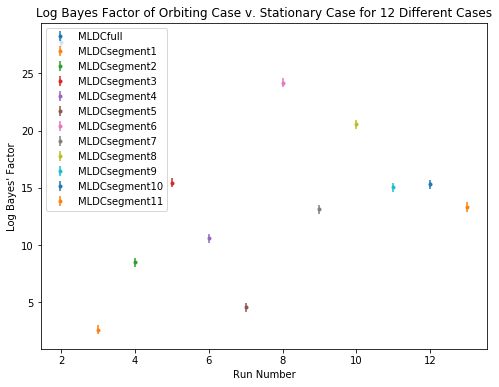

In [23]:
## Plot log Bayes' factor vs. case #
plt.figure(figsize=(8,6))#,dpi=200)
#plt.plot(runnums,K)
#plt.errorbar(casenums[0],logK[0],xerr=None,yerr=sigos[0],ls='none',marker='.')
# plt.errorbar(casenums[1],logK[1],xerr=None,yerr=sigos[1],ls='none',marker='.')
# plt.errorbar(casenums[2],logK[2],xerr=None,yerr=sigos[2],ls='none',marker='.')
# plt.errorbar(casenums[3],logK[3],xerr=None,yerr=sigos[3],ls='none',marker='.')
# plt.errorbar(casenums[4],logK[4],xerr=None,yerr=sigos[4],ls='none',marker='.')
for i in range(len(durs)):
    plt.errorbar(casenums[i],logK[i],xerr=None,yerr=sigos[i],ls='none',marker='.')

plt.title('Log Bayes Factor of Orbiting Case v. Stationary Case for %i Different Cases' % len(casenums))
plt.xlabel('Run Number')
plt.ylabel("Log Bayes' Factor")
plt.legend(cases)
plt.show()

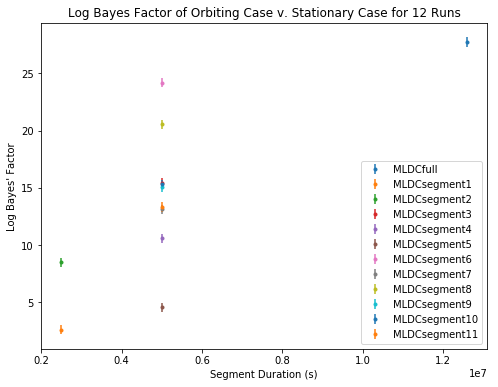

In [27]:
## Plot log Bayes' number vs. duration of segment
plt.figure(figsize=(8,6))#,dpi=200)
#plt.plot(runnums,K)
# plt.errorbar(durs[0],logK[0],xerr=None,yerr=sigos[0],ls='none',marker='.')
# plt.errorbar(durs[1],logK[1],xerr=None,yerr=sigos[1],ls='none',marker='.')
# plt.errorbar(durs[2],logK[2],xerr=None,yerr=sigos[2],ls='none',marker='.')
# plt.errorbar(durs[3],logK[3],xerr=None,yerr=sigos[3],ls='none',marker='.')
# plt.errorbar(durs[4],logK[4],xerr=None,yerr=sigos[4],ls='none',marker='.')
for i in range(len(durs)):
    plt.errorbar(durs[i],logK[i],xerr=None,yerr=sigos[i],ls='none',marker='.')

plt.title('Log Bayes Factor of Orbiting Case v. Stationary Case for %i Runs' % len(casenums))
plt.xlabel('Segment Duration (s)')
plt.ylabel("Log Bayes' Factor")
plt.legend(cases,loc=4)
plt.show()

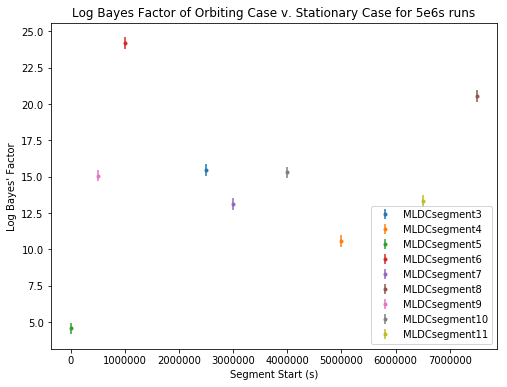

In [24]:
## Plot log Bayes' number vs. segment start point
plt.figure(figsize=(8,6))#,dpi=200)
#plt.plot(runnums,K)
# plt.errorbar(starts[0],logK[0],xerr=None,yerr=sigos[0],ls='none',marker='.')
# plt.errorbar(starts[1],logK[1],xerr=None,yerr=sigos[1],ls='none',marker='.')
# plt.errorbar(starts[2],logK[2],xerr=None,yerr=sigos[2],ls='none',marker='.')
# plt.errorbar(starts[3],logK[3],xerr=None,yerr=sigos[3],ls='none',marker='.')
# plt.errorbar(starts[4],logK[4],xerr=None,yerr=sigos[4],ls='none',marker='.')
for i in range(len(durs)):
    if i>2:
        plt.errorbar(starts[i],logK[i],xerr=None,yerr=sigos[i],ls='none',marker='.')

plt.title('Log Bayes Factor of Orbiting Case v. Stationary Case for 5e6s runs')
plt.xlabel('Segment Start (s)')
plt.ylabel("Log Bayes' Factor")
plt.legend(cases[3:])
plt.show()

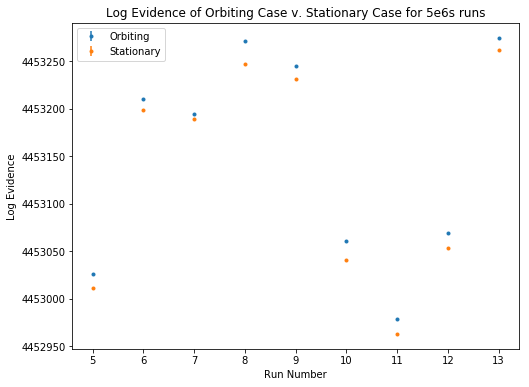

In [25]:
## Plot log Bayes' factor vs. case #
plt.figure(figsize=(8,6))#,dpi=200)
#plt.plot(runnums,K)
#plt.errorbar(casenums[0],logK[0],xerr=None,yerr=sigos[0],ls='none',marker='.')
# plt.errorbar(casenums[1],logK[1],xerr=None,yerr=sigos[1],ls='none',marker='.')
# plt.errorbar(casenums[2],logK[2],xerr=None,yerr=sigos[2],ls='none',marker='.')
# plt.errorbar(casenums[3],logK[3],xerr=None,yerr=sigos[3],ls='none',marker='.')
# plt.errorbar(casenums[4],logK[4],xerr=None,yerr=sigos[4],ls='none',marker='.')
plt.errorbar(casenums[3:],ologz[3:],xerr=None,yerr=ologzerr[3:],ls='none',marker='.')
plt.errorbar(casenums[3:],slogz[3:],xerr=None,yerr=slogzerr[3:],ls='none',marker='.')

plt.title('Log Evidence of Orbiting Case v. Stationary Case for 5e6s runs')
plt.xlabel('Run Number')
plt.ylabel("Log Evidence")
plt.legend(('Orbiting','Stationary'))
plt.show()

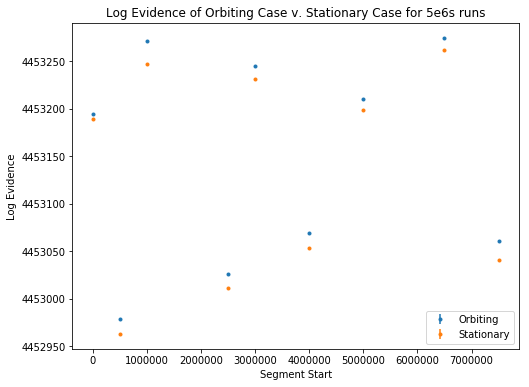

In [26]:
## Plot log Bayes' factor vs. case #
plt.figure(figsize=(8,6))#,dpi=200)
#plt.plot(runnums,K)
#plt.errorbar(casenums[0],logK[0],xerr=None,yerr=sigos[0],ls='none',marker='.')
# plt.errorbar(casenums[1],logK[1],xerr=None,yerr=sigos[1],ls='none',marker='.')
# plt.errorbar(casenums[2],logK[2],xerr=None,yerr=sigos[2],ls='none',marker='.')
# plt.errorbar(casenums[3],logK[3],xerr=None,yerr=sigos[3],ls='none',marker='.')
# plt.errorbar(casenums[4],logK[4],xerr=None,yerr=sigos[4],ls='none',marker='.')
plt.errorbar(starts[3:],ologz[3:],xerr=None,yerr=ologzerr[3:],ls='none',marker='.')
plt.errorbar(starts[3:],slogz[3:],xerr=None,yerr=slogzerr[3:],ls='none',marker='.')

plt.title('Log Evidence of Orbiting Case v. Stationary Case for 5e6s runs')
plt.xlabel('Segment Start')
plt.ylabel("Log Evidence")
plt.legend(('Orbiting','Stationary'))
plt.show()